Sınav sonuçları normal dağılımlı mıdır? Değilse normal dağılıma sahip hale getirmek için ne yapabiliriz?

Üç sınav sonucunu tek bir değişkende, hedef değişkeni olarak tutmak istiyoruz. Bunun için üç sınavın ortalamasını içeren yeni bir değişken tanımlayın. Bu yeni değişkenin ortalamasının normal dağılımlı olup olmadığını test edin. Eğer normal dağılıma sahip değilse dönüşüm yaparak normal dağılımlı hale getirmeye çalışın ve dönüşümün sonucunu test edin.

Bir önceki soruda oluşturduğumuz hedef değişkeni ile hangi değişkenler ilişkili görünüyor? Eğer amacımız sınav başarısını belirleyen etkenleri açıklamak olsaydı hangi değişkenleri veri kümemizde tutmamız gerekirdi?

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

In [12]:
df = pd.read_csv('StudentsPerformance.csv')
df.columns = ['cinsiyet', 'koken', 'aile_egt_seviyesi', 'ogle_yemegi', 
                              'hazirlik_kursu', 'matematik_notu', 'okuma_notu', 'yazma_notu']
df.head()

,cinsiyet,koken,aile_egt_seviyesi,ogle_yemegi,hazirlik_kursu,matematik_notu,okuma_notu,yazma_notu
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


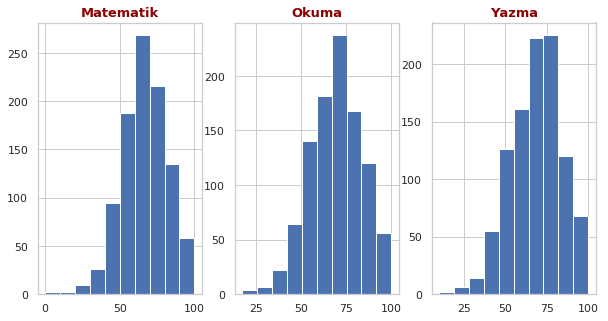

In [13]:
#Sınav sonuçları normal dağılımlı mıdır? Değilse normal dağılıma sahip hale getirmek için ne yapabiliriz?

plt.figure(figsize = (10,5))
plt.subplot(1,3,1)
plt.hist(df['matematik_notu'])
plt.title('Matematik', fontdict = baslik_font)
plt.subplot(1,3,2)
plt.hist(df['okuma_notu'])
plt.title('Okuma', fontdict = baslik_font)
plt.subplot(1,3,3)
plt.hist(df['yazma_notu'])
plt.title('Yazma', fontdict = baslik_font)
plt.show()

Normal dağılıma yakın görünüyor. Testlerimizi uygulayarak kontrol edelim.

In [14]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest


pd.options.display.float_format = '{:.5f}'.format

notlar = ['matematik_notu', 'okuma_notu', 'yazma_notu']
dagilim_testi = pd.DataFrame(columns = ['notlar', 'JB_stats','JB_pvalue', 'normal_stats', 'normal_pvalue'])

for ders in notlar:
    JB_stats = jarque_bera(df[ders])
    normal_stats = normaltest(df[ders])
    dagilim_testi = dagilim_testi.append({'notlar': ders, 'JB_stats': JB_stats[0], 'JB_pvalue': JB_stats[1],
                                         'normal_stats': normal_stats[0], 'normal_pvalue': normal_stats[1]}, 
                                        ignore_index = True)
dagilim_testi

,notlar,JB_stats,JB_pvalue,normal_stats,normal_pvalue
0,matematik_notu,15.91226,0.00035,15.40896,0.00045
1,okuma_notu,11.38330,0.00337,11.11741,0.00385
2,yazma_notu,13.98509,0.00092,13.60645,0.00111


pvalue değeri dağılımın histogramda görüldüğü kadar normal olmadığını gösteriyor. Notları normalize edelim.

In [16]:
from sklearn.preprocessing import normalize

df['normalized_mat'] = normalize(np.array(df['matematik_notu']).reshape(1,-1)).reshape(-1,1)
df['normalized_okuma'] = normalize(np.array(df['okuma_notu']).reshape(1,-1)).reshape(-1,1)
df['normalized_yazma'] = normalize(np.array(df['yazma_notu']).reshape(1,-1)).reshape(-1,1)

ozellikler = ['matematik_notu', 'normalized_mat', 'okuma_notu', 'normalized_okuma',
              'yazma_notu', 'normalized_yazma']


print('Minimum Değer: \n -------')
print(df[ozellikler].min())
print('Maksimum Değer: \n -------')
print(df[ozellikler].max())

Minimum Değer: 
 -------
matematik_notu      0.00000
normalized_mat      0.00000
okuma_notu         17.00000
normalized_okuma    0.00760
yazma_notu         10.00000
normalized_yazma    0.00454
dtype: float64
Maksimum Değer: 
 -------
matematik_notu     100.00000
normalized_mat       0.04664
okuma_notu         100.00000
normalized_okuma     0.04473
yazma_notu         100.00000
normalized_yazma     0.04535
dtype: float64


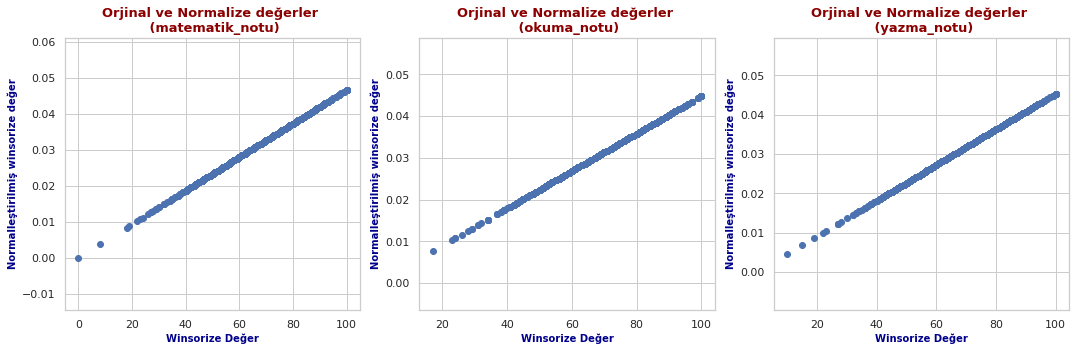

In [18]:
#Normalleşmiş değerleri grafik üzerinde görelim
plt.figure(figsize=(18,5))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.scatter(df[ozellikler[2*i]], df[ozellikler[2*i+1]])
    plt.title("Orjinal ve Normalize değerler \n ({})".format(ozellikler[2*i]), fontdict=baslik_font)
    plt.xlabel("Winsorize Değer", fontdict=eksen_font)
    plt.ylabel("Normalleştirilmiş winsorize değer", fontdict=eksen_font)

plt.show()

Üç sınav sonucunu tek bir değişkende, hedef değişkeni olarak tutmak istiyoruz. Bunun için üç sınavın ortalamasını içeren yeni bir değişken tanımlayın. Bu yeni değişkenin ortalamasının normal dağılımlı olup olmadığını test edin. Eğer normal dağılıma sahip değilse dönüşüm yaparak normal dağılımlı hale getirmeye çalışın ve dönüşümün sonucunu test edin.

In [19]:
df['not_ortalamasi']=(df['matematik_notu'] + df['okuma_notu'] + df['yazma_notu'])/3
df['not_ortalamasi'].head()

0   72.66667
1   82.33333
2   92.66667
3   49.33333
4   76.33333
Name: not_ortalamasi, dtype: float64

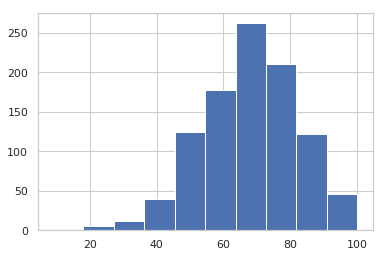

In [20]:
plt.hist(df['not_ortalamasi'])
plt.show()

In [21]:
normaltest(df['not_ortalamasi'])

NormaltestResult(statistic=15.186721327231322, pvalue=0.0005037851534494478)

In [28]:
#Normalize edelim
df["norm_not_ortalamasi"] = normalize(np.array(df["not_ortalamasi"]).reshape(1,-1)).reshape(-1,1)
normal_ozellikler=["not_ortalamasi","norm_not_ortalamasi"]


print('Minimum Değer\n-----------------',)
print(df[normal_ozellikler].min())
print('\nMaksimum Değer\n-----------------',)
print(df[normal_ozellikler].max())

Minimum Değer
-----------------
not_ortalamasi        9.00000
norm_not_ortalamasi   0.00411
dtype: float64

Maksimum Değer
-----------------
not_ortalamasi        100.00000
norm_not_ortalamasi     0.04566
dtype: float64


Bir önceki soruda oluşturduğumuz hedef değişkeni ile hangi değişkenler ilişkili görünüyor? Eğer amacımız sınav başarısını belirleyen etkenleri açıklamak olsaydı hangi değişkenleri veri kümemizde tutmamız gerekirdi?

In [37]:
df.corr()

,matematik_notu,okuma_notu,yazma_notu,normalized_mat,normalized_okuma,normalized_yazma,not_ortalamasi,norm_not_ortalamasi
matematik_notu,1.00000,0.81758,0.80264,1.00000,0.81758,0.80264,0.91875,0.91875
okuma_notu,0.81758,1.00000,0.95460,0.81758,1.00000,0.95460,0.97033,0.97033
yazma_notu,0.80264,0.95460,1.00000,0.80264,0.95460,1.00000,0.96567,0.96567
normalized_mat,1.00000,0.81758,0.80264,1.00000,0.81758,0.80264,0.91875,0.91875
normalized_okuma,0.81758,1.00000,0.95460,0.81758,1.00000,0.95460,0.97033,0.97033
normalized_yazma,0.80264,0.95460,1.00000,0.80264,0.95460,1.00000,0.96567,0.96567
not_ortalamasi,0.91875,0.97033,0.96567,0.91875,0.97033,0.96567,1.00000,1.00000
norm_not_ortalamasi,0.91875,0.97033,0.96567,0.91875,0.97033,0.96567,1.00000,1.00000


In [41]:
ttest_cinsiyet = stats.ttest_ind(df[df['cinsiyet'] == 'male']['not_ortalamasi'],
                                df[df['cinsiyet'] == 'female']['not_ortalamasi'])
ttest_hazirlik = stats.ttest_ind(df[df['hazirlik_kursu'] == 'none']['not_ortalamasi'],
                                df[df['hazirlik_kursu'] == 'completed']['not_ortalamasi'])
ttest_yemek = stats.ttest_ind(df[df['ogle_yemegi'] == 'free/reduced']['not_ortalamasi'],
                                df[df['ogle_yemegi'] == 'standard']['not_ortalamasi'])

print(ttest_cinsiyet)
print(ttest_hazirlik)
print(ttest_yemek)

Ttest_indResult(statistic=-4.169913529142, pvalue=3.311973638243664e-05)
Ttest_indResult(statistic=-8.390944443482592, pvalue=1.633780203592351e-16)
Ttest_indResult(statistic=-9.575113051511476, pvalue=7.736791812495384e-21)


In [44]:
koken = df["koken"].unique()
grup_df = df.groupby("koken")
pd.options.display.float_format = '{:.15f}'.format
for var in ["not_ortalamasi"]:
    karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
    print("{} için karşılaştırma".format(var),end='')
    for i in range(0, len(koken)):
        for j in range(i+1, len(koken)):
            ttest = stats.ttest_ind(df[df["koken"]==koken[i]][var], 
                                df[df["koken"]==koken[j]][var])
            grup_1 = koken[i]
            grup_2 = koken[j]
            istatistik = ttest[0]
            p_degeri = ttest[1]
            
            karsilastirma = karsilastirma.append({"grup_1" : grup_1 ,
                                                  "grup_2" : grup_2 ,
                                                  "istatistik": istatistik , 
                                                  "p_degeri" : p_degeri}, ignore_index=True)
    display(karsilastirma)

not_ortalamasi için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,group B,group C,-1.278246741583154,0.201747312277340
1,group B,group A,1.316504366963353,0.189093058950944
2,group B,group D,-2.803108399207725,0.005279949204375
3,group B,group E,-4.460378072613960,0.000011254806794
4,group C,group A,2.466593204095108,0.014052604831601
5,group C,group D,-1.806357695360095,0.071381586738136
6,group C,group E,-3.935868946604548,0.000095801993351
7,group A,group D,-3.717941592338664,0.000233904167488
8,group A,group E,-4.958668289961606,0.000001389791047
9,group D,group E,-2.487048058580620,0.013287580176112


Cinsiyet, hazırlık kursu ve öğle yemeği değerleri not ortalaması üzerinde etkilidir. Dolayısıyla veri kümesinde tutulmalıdır. Ancak kökenlerde not ortalamasıyla direk bir ilişkisi bulunmamaktadır.